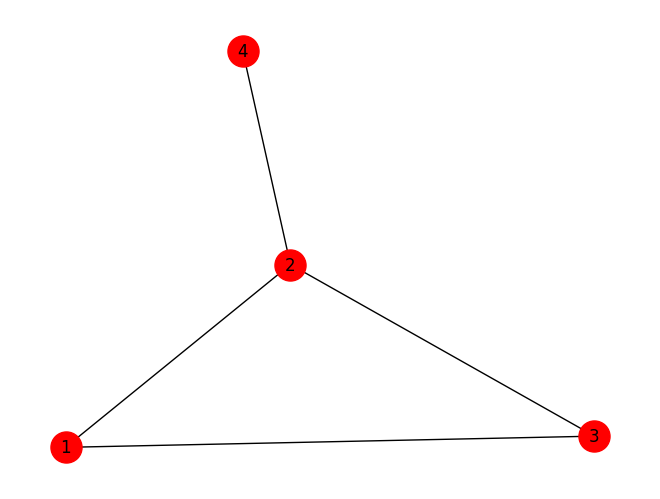

In [1]:
# 生成一个简单图（网络）
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个空图
G = nx.Graph()
# 向该图中添加节点和连边
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)])
# 可视化图
nx.draw(G,node_size=500,node_color='red',with_labels=True)
# plt.savefig('fig1.png',dpi=300)

In [14]:
# 邻接矩阵，是网络的一种等价形式，网络的很多特征都是根据邻接矩阵推导出来的
# from IPython.display import Image
# Image(filename=r"F:\na\09寒假任务\NetworkX\1.png",width=60,height=40)
import networkx as nx

# 无向无权
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)])
As = nx.adjacency_matrix(G)
print(As)
# 注意：对于networkx2.6以后的版本（如：2.7，2.8）无法正常打印As,但并不影响获取邻接矩阵
# 获取二维邻接矩阵
A = As.todense()
print(A)
# 有向无权
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 3), (3, 1), (2, 4)])
As = nx.adjacency_matrix(G)
A = As.todense()
print(A)
# 无向加权
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_weighted_edges_from([(1, 2, 2.0), (2, 3, 0.5), (3, 1, 1.0), (2, 4, 4.0)])
As = nx.adjacency_matrix(G)
A = As.todense()
print(A)
# 无向带自环
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 1), (1, 2), (2, 3), (3, 1), (2, 4), (4, 4)])
As = nx.adjacency_matrix(G)
A = As.todense()
print(A)


  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1
[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]
[[0 1 0 0]
 [0 0 1 1]
 [1 0 0 0]
 [0 0 0 0]]
[[0.  2.  1.  0. ]
 [2.  0.  0.5 4. ]
 [1.  0.5 0.  0. ]
 [0.  4.  0.  0. ]]


matrix([[1, 1, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [0, 1, 0, 1]], dtype=int32)

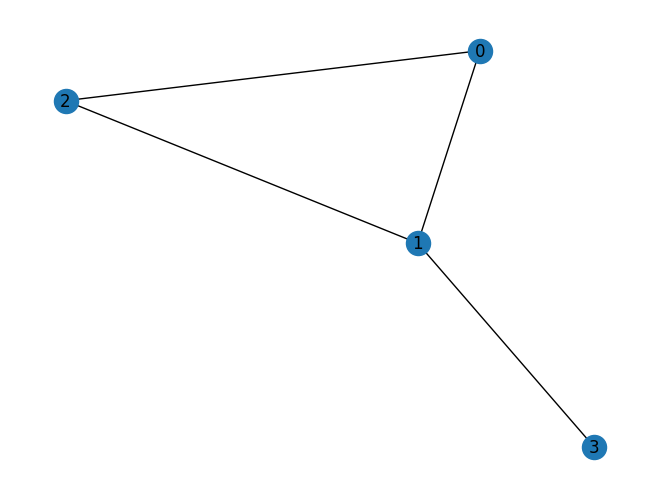

In [2]:
#第四节，根据连接矩阵生成对应网络
import networkx as nx
import numpy as np

# 小规模矩阵
A = np.array([[0, 1, 1, 0],
              [1, 0, 1, 1],
              [1, 1, 0, 0],
              [0, 1, 0, 0]], dtype=int)
G = nx.from_numpy_array(A)
nx.draw(G, with_labels=True)


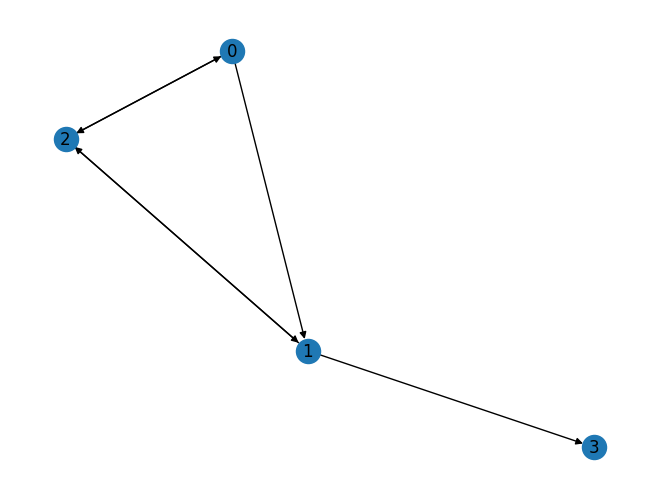

In [3]:
# 有向网络的情况也是类似的
DA = np.array([[0, 1, 1, 0],
               [0, 0, 1, 1],
               [1, 1, 0, 0],
               [0, 0, 0, 0]])
DG = nx.from_numpy_array(DA, create_using=nx.DiGraph())
nx.draw(DG, with_labels=True)

In [ ]:
#也可以利用pandas读取外部的矩阵数据
# import pandas as pd

# df = pd.read_csv('adjacent_matrix.csv', header=None, index_col=None)
# G = nx.from_pandas_adjacency(df)
#若为有向网络
# G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph())


In [5]:
#05课：度、平均度以及度分布
import networkx as nx
import numpy as np
#无向无权网络
# 创建空图
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,4),(3,4)])
# 获取网络G的度
d = dict(nx.degree(G))
print(d)
# 获取网络G的平均度
print("平均度为：", 2*len(G.edges())/len(G.nodes))
# 或采用如下方式
print("平均度为：", sum(d.values())/len(G.nodes))

# 获取度值出现的频数：返回所有位于区间[0, dmax]的度值的频率列表
nx.degree_histogram(G)

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为： 2.0
平均度为： 2.0


[0, 1, 2, 1]

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

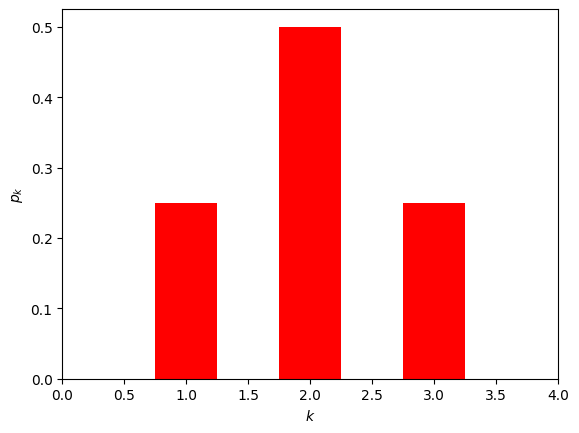

In [6]:
# 绘制度分布直方图
# 导入绘图库
import matplotlib.pyplot as plt
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0,4])

In [7]:
#无向加权网络
# 创建加权网络
WG = nx.Graph()
WG.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5), (0, 2, 1.5)])

# 获取网络G的度
wd = dict(nx.degree(WG, weight='weight'))
print(wd)
# 获取网络WG的平均加权度
print("平均加权度为：", sum(wd.values())/len(G.nodes))

{0: 4.5, 1: 10.5, 2: 9.0}
平均加权度为： 6.0


所有节点的入度为： {1: 0, 2: 1, 3: 3, 4: 1}
所有节点的出度为： {1: 2, 2: 1, 3: 1, 4: 1}
{1: 0, 2: 1, 3: 3, 4: 1}
[0, 1, 2, 3]
[1 2 0 1]


(-1.0, 4.0)

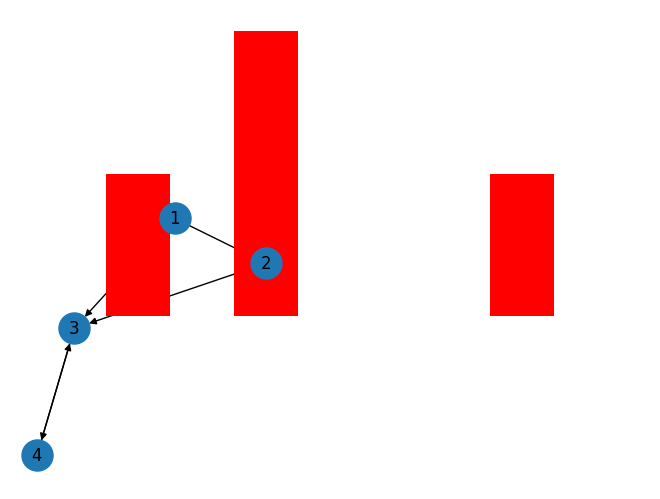

In [10]:
#有向网络
DG = nx.DiGraph()
# 添加节点
DG.add_nodes_from([1,2,3,4])
# 添加边
DG.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,3)])
nx.draw(DG, node_size=500, with_labels=True)

print("所有节点的入度为：", dict(DG.in_degree()))
print("所有节点的出度为：", dict(DG.out_degree()))
### 分别绘制入度和出度分布
di = dict(DG.in_degree())
print(di)
xi = list(range(max(di.values())+1))
yi = np.bincount(list(di.values()))
print(xi)
print(yi)

# 绘制入度频数分布直方图
plt.bar(xi, yi, width=0.5, color="red")
plt.xlabel("$k_{in}$")
plt.ylabel("$p(k_{in})$")
plt.xlim([-1,4])

# 出度分布与之类似

In [14]:
# 06课：路径、距离、直径、效率和平均距离
import networkx as nx
import numpy as np
# 1、无向无权网络
# 创建空图
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4,5])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,5),(3,4),(4,5)])
# 节点间的最短路径以及其长度
i, j = 1, 3
print(nx.shortest_path(G, i, j))
dij = nx.shortest_path_length(G, i, j)
dij
# 遍历所有节点间的最短路径长度
nodes = list(G.nodes())
for u in range(len(nodes)-1):
    for v in range(u+1, len(nodes)):
        i, j = nodes[u], nodes[v]
        if nx.has_path(G, i, j):
            dij = nx.shortest_path_length(G, i, j)
            print("节点{}和{}之间的最短路径长度为{}".format(i, j, dij))
        else:
            print("节点{}和{}之间没有路径！".format(i, j))
# 直径：G是连通网络才可调用以下函数
print(nx.diameter(G))

# 平均最短路径长度
print(nx.average_shortest_path_length(G))

[1, 2, 3]
节点1和2之间的最短路径长度为1
节点1和3之间的最短路径长度为2
节点1和4之间的最短路径长度为3
节点1和5之间的最短路径长度为2
节点2和3之间的最短路径长度为1
节点2和4之间的最短路径长度为2
节点2和5之间的最短路径长度为1
节点3和4之间的最短路径长度为1
节点3和5之间的最短路径长度为2
节点4和5之间的最短路径长度为1
3
1.6


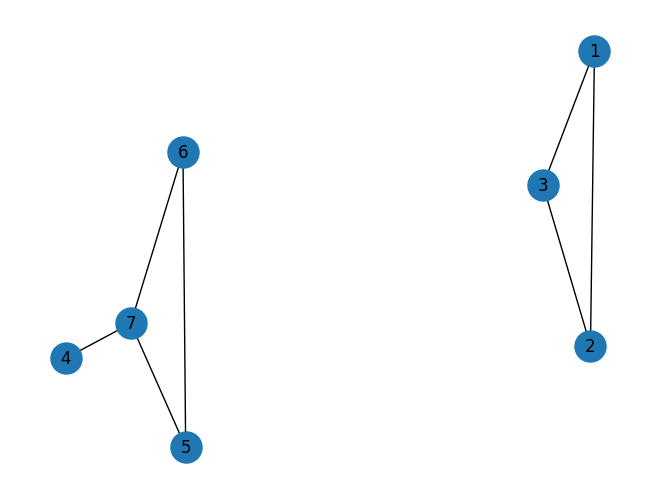

In [19]:
#无向加权网络
# 创建加权网络
WG = nx.Graph()
WG.add_weighted_edges_from([(1,2,3.0),(2,3,1.5),
(2,5,2.5),(3,4,2.0),(4,5,4.0)])

# 加权网络节点间的最短路径长度
i, j = 1, 3
dij = nx.shortest_path_length(WG, i, j, weight='weight')
dij
Ga = nx.Graph()
Ga.add_nodes_from([1,2,3,4,5,6,7])
Ga.add_edges_from([(1,2),(1,3),(2,3),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Ga, node_size=500, with_labels=True)

False
True


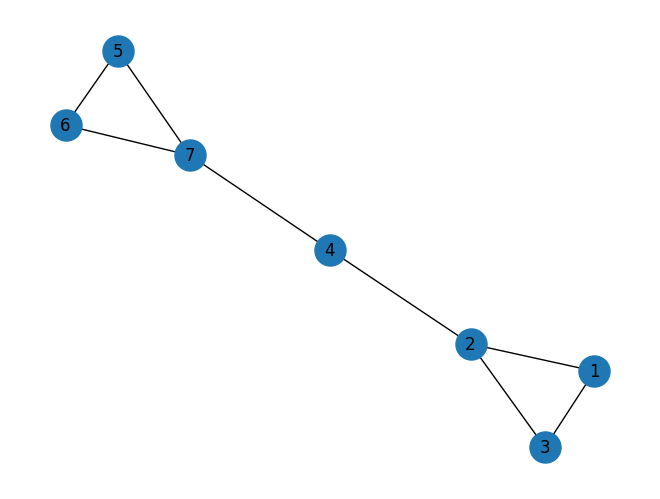

In [18]:
Gb = nx.Graph()
Gb.add_nodes_from([1,2,3,4,5,6,7])
Gb.add_edges_from([(1,2),(1,3),(2,3),(2,4),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Gb, node_size=500, with_labels=True)
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

{1: 0, 2: 0.16666666666666666, 3: 0, 4: 0.3333333333333333, 5: 0.6666666666666666, 6: 0, 7: 1.0}


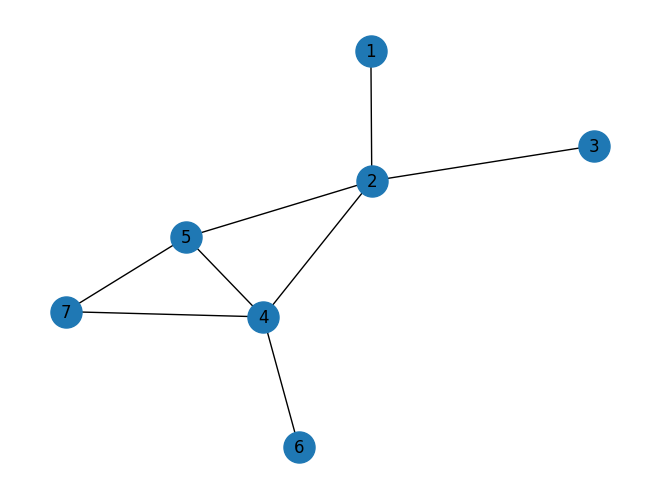

In [22]:
#07课：网络的局部集聚系数、平均集聚系数以及全局集聚系数
import networkx as nx
import numpy as np
# 创建一个简单无向无权图来展开演示
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)
# 节点的局部集聚系数
# 返回字典格式，键为节点标签，值为对应的节点局部集聚系数
print(nx.clustering(G))

In [25]:
# 平均集聚系数
print(nx.average_clustering(G))
# 全局集聚系数
print(nx.transitivity(G))
# # 若图G为加权图，可增加权重参数来求解局部集聚系数和平均集聚系数
# nx.clustering(G, weight='weight')
# nx.average_clustering(G, weight='weight')

0.3095238095238095
0.375


{1: {2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0}, 2: {1: 1, 3: 1, 4: 2, 5: 2, 6: 1, 7: 2, 8: 0}, 3: {1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0}, 4: {1: 1, 2: 2, 3: 1, 5: 3, 6: 1, 7: 2, 8: 0}, 5: {1: 1, 2: 2, 3: 1, 4: 3, 6: 1, 7: 2, 8: 0}, 6: {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 8: 0}, 7: {1: 1, 2: 2, 3: 1, 4: 2, 5: 2, 6: 1, 8: 0}, 8: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}}


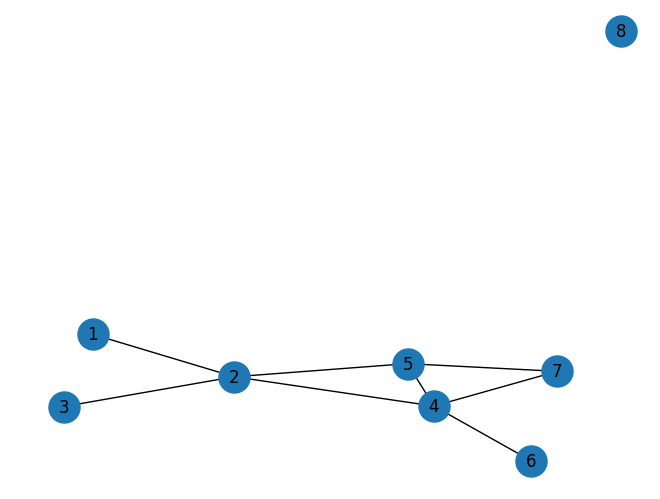

In [28]:
#08课：网络节点之间的独立路径数量
import networkx as nx
from networkx.algorithms import approximation as approx
# 创建一个简单无向图来展开演示
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)
# 计算所有节点对之间的节点连通性：独立路径数量
print(approx.all_pairs_node_connectivity(G))
# 输出结果为一个字典：键为源节点，值也为一个字典，
# 该字典的键为目标节点，值为对应的独立路径数量。

{0: {1: 4, 2: 4, 3: 4, 4: 4, 5: 4}, 1: {0: 4, 2: 4, 3: 4, 4: 4, 5: 4}, 2: {0: 4, 1: 4, 3: 4, 4: 4, 5: 4}, 3: {0: 4, 1: 4, 2: 4, 4: 4, 5: 4}, 4: {0: 4, 1: 4, 2: 4, 3: 4, 5: 4}, 5: {0: 4, 1: 4, 2: 4, 3: 4, 4: 4}}
4


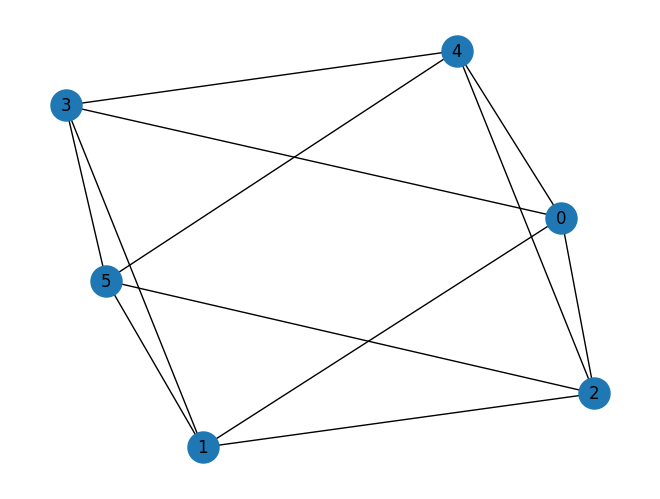

In [33]:
approx.local_node_connectivity(G, 2, 4)
# 该算法是一种快速逼近，给出了两个节点之间的节点独立路径实际数量的严格下界
# node_connectivity仅针对无向图
# 如果提供了源节点和目标节点，此函数等同于local_node_connectivity
approx.node_connectivity(G)

G2 = nx.octahedral_graph() # 柏拉图式的八面体图
nx.draw(G2, node_size=500, with_labels=True)
print(approx.all_pairs_node_connectivity(G2))
print(approx.node_connectivity(G2))

{1: 4.0, 2: 2.25, 3: 4.0, 4: 2.5, 5: 3.3333333333333335, 6: 4.0, 7: 3.5}

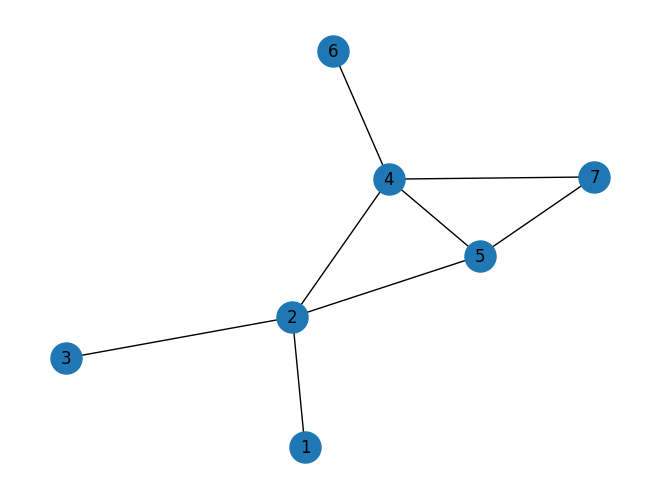

In [37]:
#09课：计算网络的相关性(匹配)系数、平均近邻度
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)
nx.degree_assortativity_coefficient(G)
nx.degree_pearson_correlation_coefficient(G)
# 平均近邻度
nx.average_neighbor_degree(G)

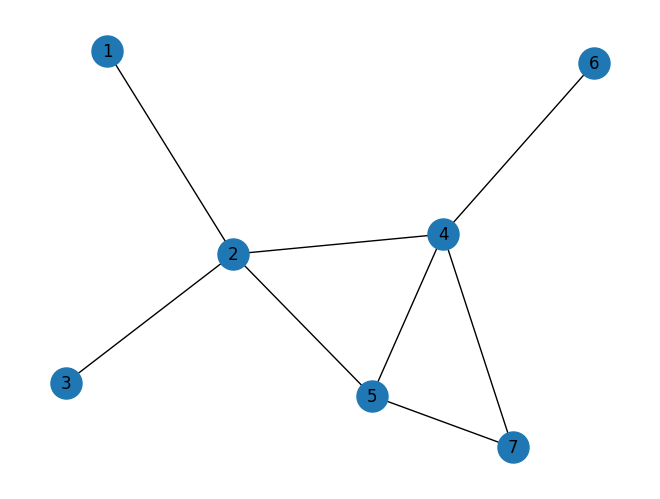

In [39]:
#10课：计算网络节点的中心性
import networkx as nx
# 创建一个简单无向图来展开演示
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

In [40]:
# 度中心性
print(nx.degree_centrality(G))
# 遍历输出结果
DC = nx.degree_centrality(G)
for i in DC.keys():
    print("节点{}的度中心性值为{:.4f}".format(i, DC[i]))

{1: 0.16666666666666666, 2: 0.6666666666666666, 3: 0.16666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.16666666666666666, 7: 0.3333333333333333}
节点1的度中心性值为0.1667
节点2的度中心性值为0.6667
节点3的度中心性值为0.1667
节点4的度中心性值为0.6667
节点5的度中心性值为0.5000
节点6的度中心性值为0.1667
节点7的度中心性值为0.3333


In [41]:
# 特征向量中心性
print(nx.eigenvector_centrality(G))
# 接近度中心性
print(nx.closeness_centrality(G))
# 节点介数中心性
print(nx.betweenness_centrality(G))
# 边介数中心性
print(nx.edge_betweenness_centrality(G))
# PageRank中心性
print(nx.pagerank(G))

{1: 0.17163197298906557, 2: 0.48607121913025153, 3: 0.17163197298906557, 4: 0.5416128697886126, 5: 0.49170712426901436, 6: 0.19124263164112745, 7: 0.3648637563453076}
{1: 0.46153846153846156, 2: 0.75, 3: 0.46153846153846156, 4: 0.75, 5: 0.6666666666666666, 6: 0.46153846153846156, 7: 0.5}
{1: 0.0, 2: 0.6, 3: 0.0, 4: 0.43333333333333335, 5: 0.1, 6: 0.0, 7: 0.0}
{(1, 2): 0.2857142857142857, (2, 3): 0.2857142857142857, (2, 4): 0.3571428571428571, (2, 5): 0.21428571428571427, (4, 5): 0.09523809523809523, (4, 6): 0.2857142857142857, (4, 7): 0.16666666666666666, (5, 7): 0.11904761904761904}
{1: 0.07394083453512931, 2: 0.24711838758037688, 3: 0.07394083453512931, 4: 0.23621729817083723, 5: 0.17573965983237305, 6: 0.07162495997566895, 7: 0.12141802537048527}


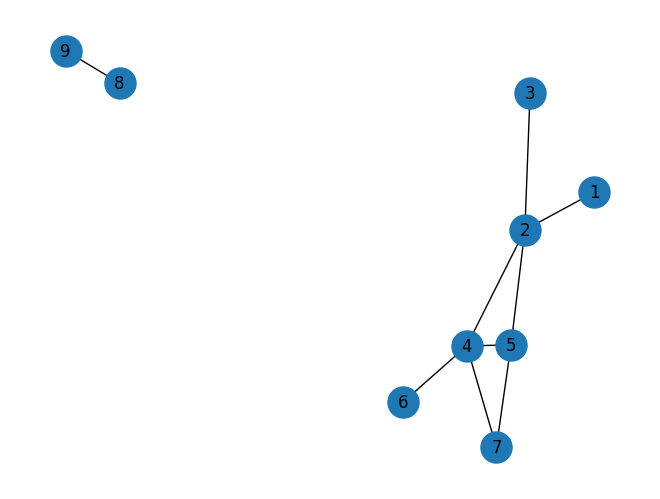

In [42]:
# 11课：获取网络的最大连通子图
import networkx as nx
# 创建一个不连通无向图来展开演示
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7),(8,9)])
nx.draw(G, node_size=500, with_labels=True)

False
2


'Graph with 7 nodes and 8 edges'

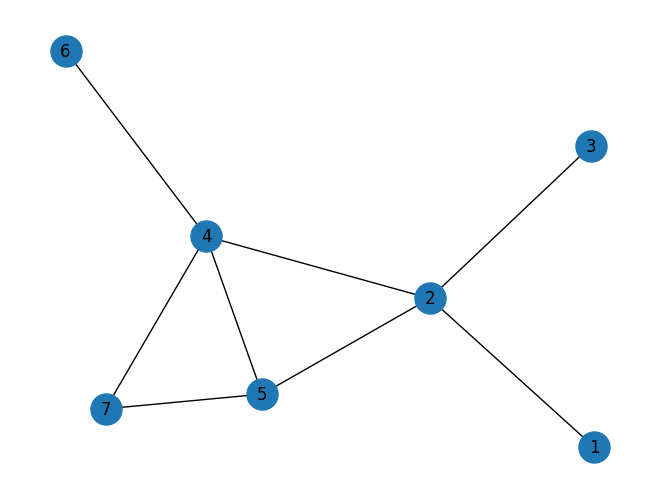

In [45]:
# 首先判断网络的连通性
print(nx.is_connected(G))
# 获取连通组件（子图）的数量
print(nx.number_connected_components(G))
# 获取所有连通子图：降序排序
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# 获取最大连通子图
largest_cc = G.subgraph(Gcc[0])
nx.draw(largest_cc, node_size=500, with_labels=True)
nx.info(largest_cc)

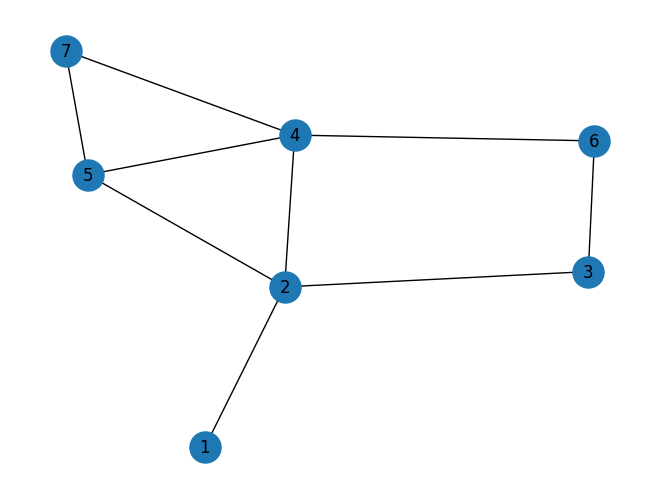

In [46]:
# largest_cc.add_edge(3,6) # 连通子图不支持修改：NetworkXError: Frozen graph can't be modified
# 可以复制，在复制的图上修改
LCC = largest_cc.copy()
LCC.add_edge(3,6)
nx.draw(LCC, node_size=500, with_labels=True)

{1: 1, 2: 2, 3: 1, 4: 2, 5: 2, 6: 1, 7: 2}


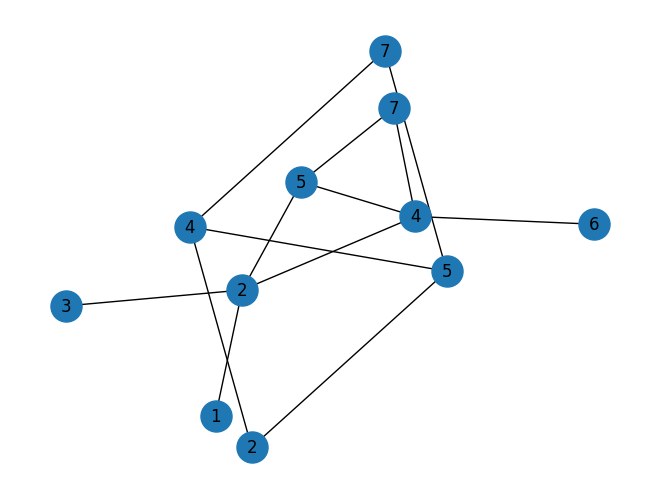

In [49]:
#12课网络的k核
import networkx as nx
# 创建一个简单无向图来展开演示
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)
# 计算每个节点的K核值
print(nx.core_number(G))
# 获得度大于等于k的最大子图
k_subgraph = nx.k_core(G, k=2)
nx.draw(k_subgraph, node_size=500, with_labels=True)

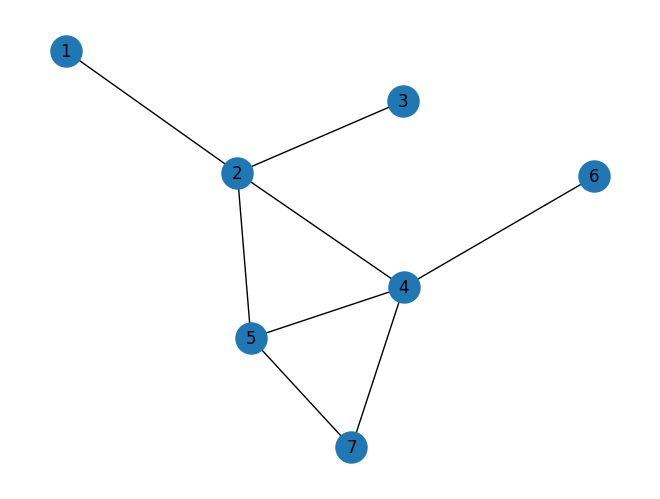

In [51]:
#13课：连通网络的效率
import networkx as nx
# 创建一个简单连通无向图来展开演示
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

In [54]:
# 计算指定节点对之间的效率：节点之间最短路径距离的倒数
print(nx.efficiency(G, 3, 7))
# 平均局部效率：网络节点的局部效率是该节点的邻居引起的子图的平均全局效率。
# 平均局部效率是每个节点的局部效率的平均值。
print(nx.local_efficiency(G))
# 全局效率：所有节点对之间效率的平均值
print(nx.global_efficiency(G))

0.3333333333333333
0.3452380952380953
0.6587301587301587


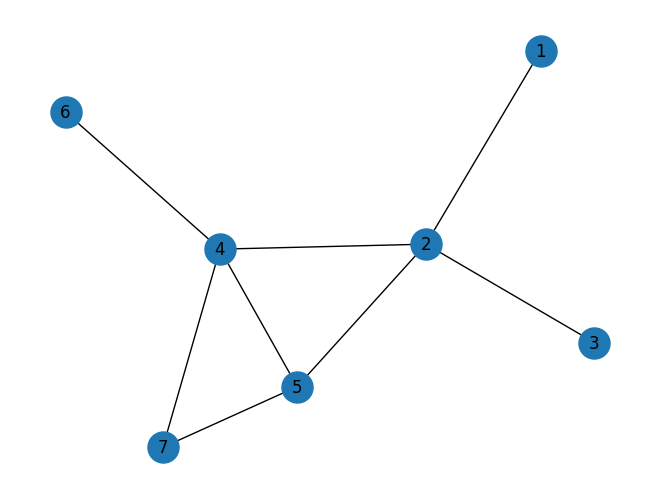

In [55]:
# 14课：针对图、节点以及连边的一些基本功能
import networkx as nx
# 创建一个简单连通无向图来展开演示
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

In [58]:
# 获取图节点的度
print(dict(nx.degree(G)))
# 获取图的基本信息
print(nx.info(G))
# 获取指定节点的信息
print(nx.info(G, 4))
# 计算图连边密度
print(nx.density(G))
# 返回图节点标签
print(nx.nodes(G))
# 返回节点数量
print(nx.number_of_nodes(G))
# 获取指定节点的邻居
print(list(nx.neighbors(G, 2)))
# 获取指定节点的非邻居
print(list(nx.non_neighbors(G, 2)))
# 获取图中两个节点的公共邻居
print(list(nx.common_neighbors(G, 2, 4)))
# 返回所有连边
print(nx.edges(G))
# 返回连边数量
print(nx.number_of_edges(G))

{1: 1, 2: 4, 3: 1, 4: 4, 5: 3, 6: 1, 7: 2}
Graph with 7 nodes and 8 edges
Node 4 has the following properties:
Degree: 4
Neighbors: 2 5 6 7
0.38095238095238093
[1, 2, 3, 4, 5, 6, 7]
7
[1, 3, 4, 5]
[6, 7]
[5]
[(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (4, 6), (4, 7), (5, 7)]
8


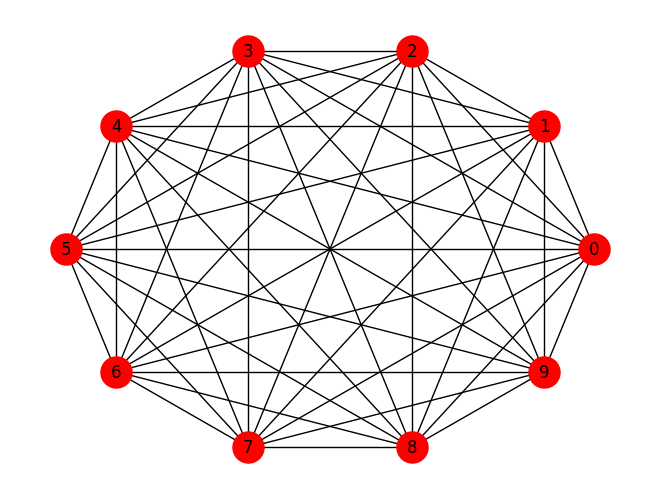

In [62]:
# 15课：常见的图（网络）生成器
# 规则、ER随机、WS小世界以及BA无标度网络的生成
import networkx as nx
# 生成包含n个节点的完全图（全连接图）
n = 10
G1 = nx.complete_graph(10)
pos = nx.circular_layout(G1)
nx.draw(G1, pos, node_size=500, node_color='red', with_labels=True)


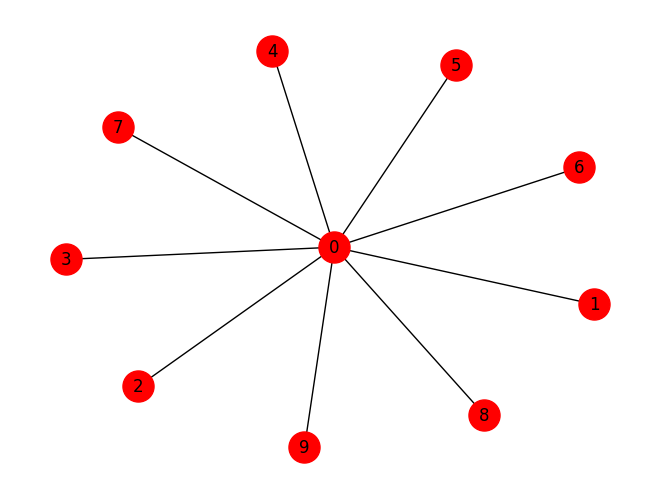

In [63]:
# 生成包含n个节点的星型图
n = 10
G2 = nx.star_graph(n-1)
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_size=500, node_color='red', with_labels=True)

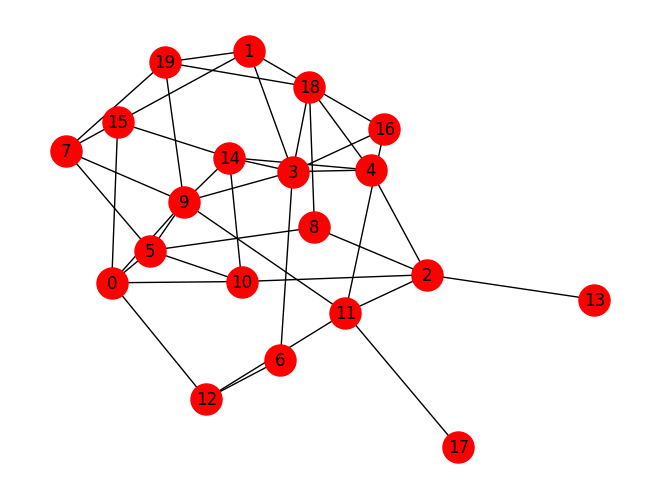

In [64]:
# 生成包含n个节点，连边概率为p的ER随机图
n, p = 20, 0.2
G3 = nx.erdos_renyi_graph(n, p)
nx.draw(G3, node_size=500, node_color='red', with_labels=True)

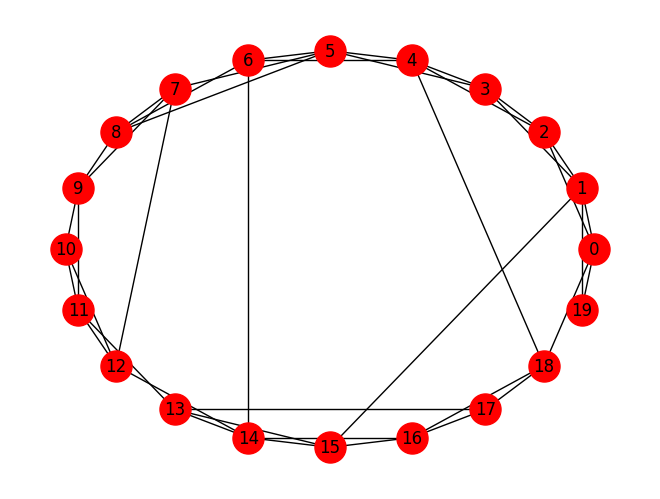

In [65]:
# 生成包含n个节点，重连概率为p的WS小世界网络
n, k, p = 20, 4, 0.2
# 当p=0时，便退化成了k近邻规则网络
G4 = nx.watts_strogatz_graph(n, k, p)
pos = nx.circular_layout(G4)
nx.draw(G4, pos, node_size=500, node_color='red', with_labels=True)

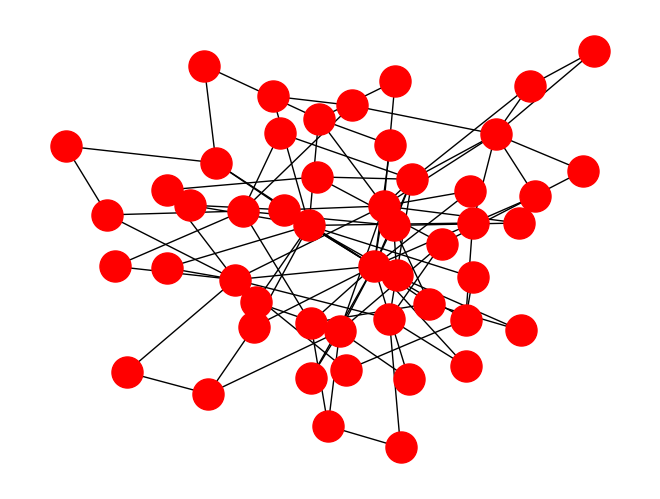

In [66]:
# 生成包含n个节点，参数m=2的BA无标度网络
n, m = 50, 2
G5 = nx.barabasi_albert_graph(n, m)
pos = nx.spring_layout(G5)
nx.draw(G5, pos, node_size=500, node_color='red', with_labels=False)

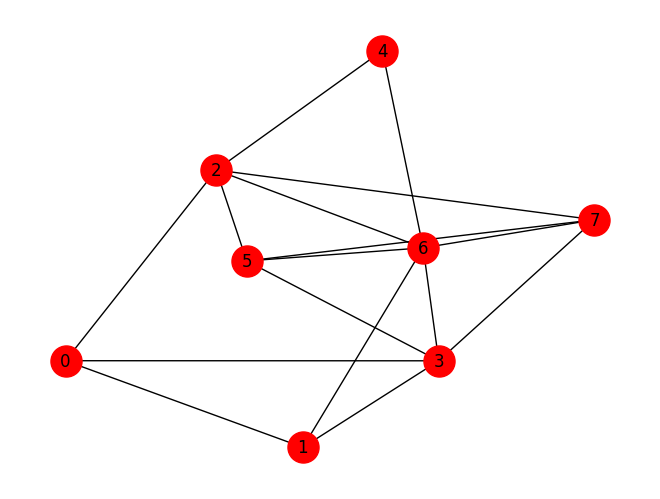

In [68]:
#16课：图的各种矩阵
import networkx as nx
# 生成包含n个节点，连边概率为p的ER随机图
n, p = 8, 0.5
G = nx.erdos_renyi_graph(n, p)
nx.draw(G, node_size=500, node_color='red', with_labels=True)

In [69]:

# 邻接矩阵
As = nx.adjacency_matrix(G) 
print(As)
# 注意：对于networkx2.6以后的版本（如2.7，2.8）无法正常打印As，
# 会出现：FutureWarning: adjacency_matrix will return a
# scipy.sparse array instead of a matrix in Networkx 3.0.
# 但并不影响获取邻接矩阵。

# 转化成二维矩阵
print(As.todense())

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 3)	1
  (1, 6)	1
  (2, 0)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (3, 0)	1
  (3, 1)	1
  (3, 5)	1
  (3, 6)	1
  (3, 7)	1
  (4, 2)	1
  (4, 6)	1
  (5, 2)	1
  (5, 3)	1
  (5, 6)	1
  (5, 7)	1
  (6, 1)	1
  (6, 2)	1
  (6, 3)	1
  (6, 4)	1
  (6, 5)	1
  (6, 7)	1
  (7, 2)	1
  (7, 3)	1
  (7, 5)	1
  (7, 6)	1
[[0 1 1 1 0 0 0 0]
 [1 0 0 1 0 0 1 0]
 [1 0 0 0 1 1 1 1]
 [1 1 0 0 0 1 1 1]
 [0 0 1 0 0 0 1 0]
 [0 0 1 1 0 0 1 1]
 [0 1 1 1 1 1 0 1]
 [0 0 1 1 0 1 1 0]]


In [70]:
# 返回G的关联矩阵：N*M，N为节点数，M为连边数
IM = nx.incidence_matrix(G)
IM.todense()

matrix([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.]])

In [71]:
# 返回G的拉普拉斯矩阵
Ls = nx.laplacian_matrix(G)
# print(Ls)
L = Ls.todense()  # L = D - A，D为节点度组成的对角矩阵，A为邻接矩阵
print(L)

[[ 3 -1 -1 -1  0  0  0  0]
 [-1  3  0 -1  0  0 -1  0]
 [-1  0  5  0 -1 -1 -1 -1]
 [-1 -1  0  5  0 -1 -1 -1]
 [ 0  0 -1  0  2  0 -1  0]
 [ 0  0 -1 -1  0  4 -1 -1]
 [ 0 -1 -1 -1 -1 -1  6 -1]
 [ 0  0 -1 -1  0 -1 -1  4]]


In [72]:
# 返回G的标准化拉普拉斯矩阵
NLs = nx.normalized_laplacian_matrix(G)
NL = NLs.todense()
print(NL)

[[ 1.         -0.33333333 -0.25819889 -0.25819889  0.          0.
   0.          0.        ]
 [-0.33333333  1.          0.         -0.25819889  0.          0.
  -0.23570226  0.        ]
 [-0.25819889  0.          1.          0.         -0.31622777 -0.2236068
  -0.18257419 -0.2236068 ]
 [-0.25819889 -0.25819889  0.          1.          0.         -0.2236068
  -0.18257419 -0.2236068 ]
 [ 0.          0.         -0.31622777  0.          1.          0.
  -0.28867513  0.        ]
 [ 0.          0.         -0.2236068  -0.2236068   0.          1.
  -0.20412415 -0.25      ]
 [ 0.         -0.23570226 -0.18257419 -0.18257419 -0.28867513 -0.20412415
   1.         -0.20412415]
 [ 0.          0.         -0.2236068  -0.2236068   0.         -0.25
  -0.20412415  1.        ]]


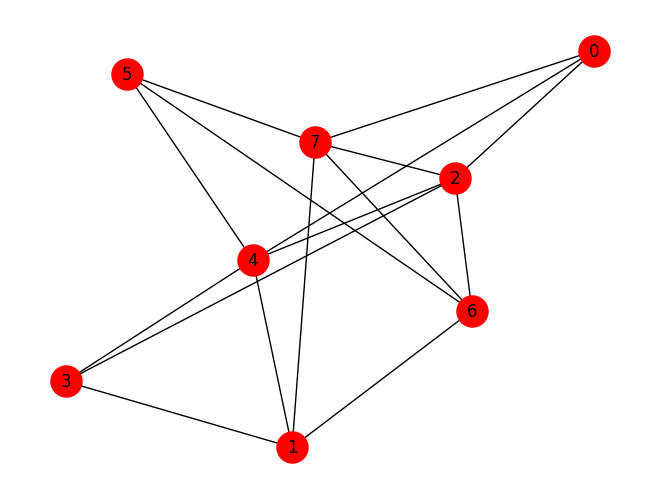

In [76]:
#17课：计算图的邻接矩阵的谱和拉普拉斯矩阵的谱（特征值）
import networkx as nx
import numpy as np
# 生成包含n个节点，连边概率为p的ER随机图
n, p = 8, 0.5
G = nx.erdos_renyi_graph(n, p)
nx.draw(G, node_size=500, node_color='red', with_labels=True)

In [77]:

# 计算邻接矩阵的特征值
print(np.real(nx.adjacency_spectrum(G)))

# 计算拉普拉斯矩阵的特征值：第一个特征值通常为0
print(np.real(nx.laplacian_spectrum(G)))


[ 4.1317461  -2.83414203 -1.85843072  1.21098376  0.73027796 -1.13660855
 -0.3680394   0.12421288]
[1.77635684e-15 2.34234232e+00 2.64333839e+00 3.68077763e+00
 4.57224237e+00 5.53314130e+00 5.91947992e+00 7.30867808e+00]


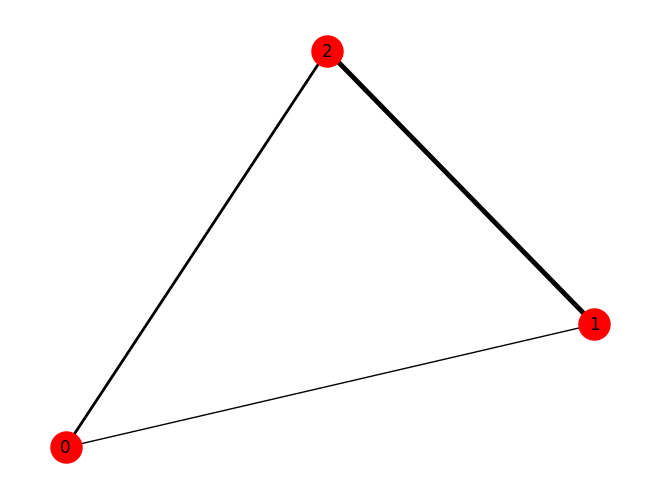

In [78]:
# 18课：网络与其他数据之间的转换
import networkx as nx
# 将字典数据转化为网络
d = {0: {1: {"weight": 1}, 2: {"weight": 2}}, 1: {2: {"weight": 3.5}}}
G = nx.Graph(d)
# 或者
# G = nx.from_dict_of_dicts(d)
edge_width = nx.get_edge_attributes(G, "weight")
# print(width)
nx.draw(G, node_size=500, node_color='red', with_labels=True, width=list(edge_width.values()))

In [80]:
# 反过来把网络转换成字典数据
print(nx.to_dict_of_dicts(G))
# 其他转换格式使用类似
edgelist = nx.to_edgelist(G)
print(edgelist)
G = nx.from_edgelist(edgelist)
# 获取邻接矩阵：matrix格式
A = nx.to_numpy_matrix(G)
A
# 获取邻接矩阵：array格式
A = nx.to_numpy_array(G)
A

{0: {1: {'weight': 1}, 2: {'weight': 2}}, 1: {0: {'weight': 1}, 2: {'weight': 3.5}}, 2: {0: {'weight': 2}, 1: {'weight': 3.5}}}
[(0, 1, {'weight': 1}), (0, 2, {'weight': 2}), (1, 2, {'weight': 3.5})]


array([[0. , 1. , 2. ],
       [1. , 0. , 3.5],
       [2. , 3.5, 0. ]])

In [ ]:
#19课：通过pandas读取外部网络数据生成网络
import networkx as nx
import pandas as pd
# df = pd.read_excel("edges.xlsx")
# G = nx.from_pandas_edgelist(df, 'source', 'target','weight', create_using = nx.Graph())
# # 若为有向图，create_using = nx.DiGraph()
# # 若为无权无向网络则：G = nx.from_pandas_edgelist(df, 'source', 'target', create_using = nx.Graph())
# edge_width = nx.get_edge_attributes(G, "weight")
# nx.draw(G, node_size=500, node_color='red', with_labels=True, width=list(edge_width.values()))
# 读取外部邻接矩阵数据：见第04课：已知邻接矩阵A，生成A对应的网络
df = pd.read_csv("adjacency_matrix.csv", header=None, index_col=None)
G = nx.from_pandas_adjacency(df)
# 若为有向网络
# G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph())

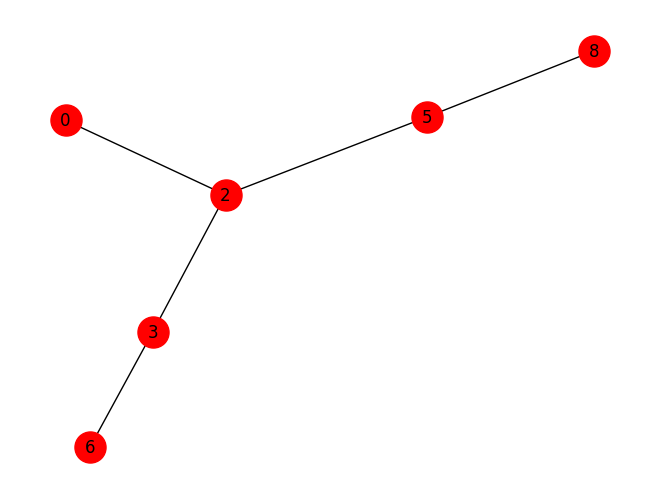

In [83]:
# 20课：对网络节点重新编号
import networkx as nx
G = nx.path_graph(3)
sorted(G)
mapping = {0: "a", 1: "b", 2: "c"}
H = nx.relabel_nodes(G, mapping)
sorted(H)
# 应用场景：假如你从网络获取了一个真实网络数据集，但其节点编号不连续，
# 此时，你可以将节点重新按照一定的顺序来编号
G = nx.Graph()
G.add_nodes_from([0,2,3,5,6,8]) # 节点不连续
G.add_edges_from([(0,2),(2,3),(2,5),(3,6),(5,8)])
nx.draw(G, node_size=500, node_color='red', with_labels=True)

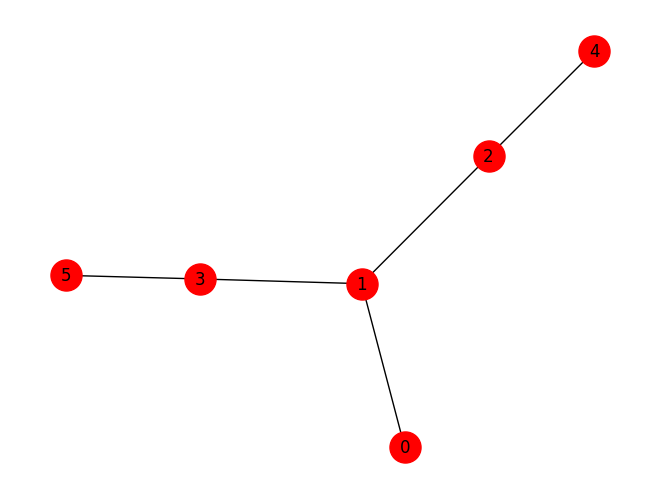

In [84]:
# 重新编号为0~(len(G.nodes())-1)
mapping = dict(zip(G, range(len(G.nodes()))))
G = nx.relabel_nodes(G, mapping)
nx.draw(G, node_size=500, node_color='red', with_labels=True)

In [85]:
# 21课：网络的读与写功能介绍，仔细阅读
import networkx as nx
G = nx.barabasi_albert_graph(10,2)

# 邻接表格式
# 将网络G保存为邻接表数据
nx.write_adjlist(G, "BA.adjlist")

# 读取外部邻接表数据生成网络
G = nx.read_adjlist("BA.adjlist", create_using=nx.Graph)

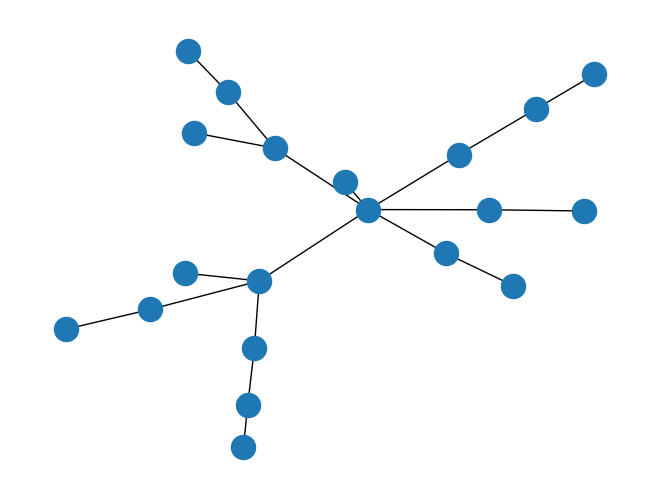

In [86]:
#22课：网络可视化（初级）
import networkx as nx
G = nx.barabasi_albert_graph(20, 1)
nx.draw(G)

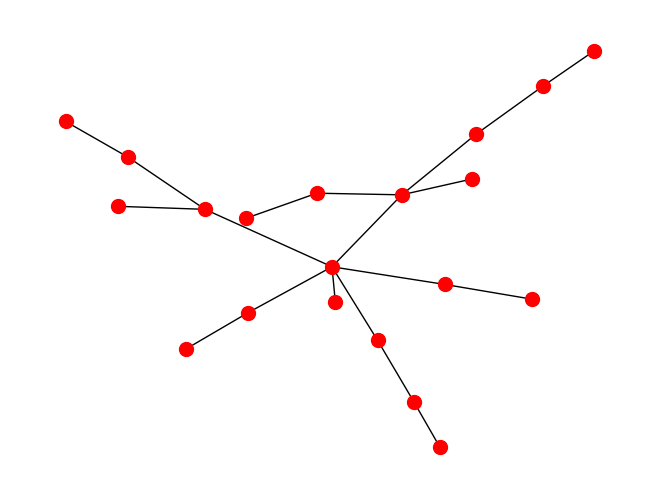

In [87]:
# 设置布局，节点大小，节点颜色，连边颜色，标签等
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=100, node_color="red")

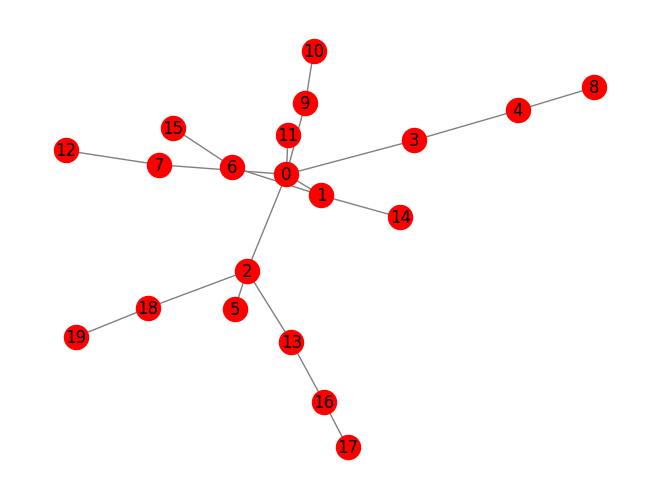

In [88]:
# 当设置的属性较多时，可以将其保存在字典中，以**不定长参数传入
options = {
    'pos': nx.spring_layout(G),
    'node_size': 300,
    'node_color': "red",
    'edge_color': "gray",
    'width': 1.0, # 连边粗细
    'with_labels': True,
}
nx.draw(G, **options)

{(0, 1): Text(-1.5, 0.5, '2'),
 (0, 2): Text(-1.5, 0.0, '8'),
 (0, 3): Text(-1.5, -0.5, '1'),
 (1, 2): Text(-1.0, 0.5, '6'),
 (1, 4): Text(0.0, 1.0, '1'),
 (2, 3): Text(-1.0, -0.5, '7'),
 (2, 4): Text(0.0, 0.5, '5'),
 (2, 5): Text(0.0, 0.0, '1'),
 (2, 6): Text(0.0, -0.5, '2'),
 (3, 6): Text(0.0, -1.0, '9'),
 (4, 5): Text(1.0, 0.5, '3'),
 (4, 7): Text(1.5, 0.5, '8'),
 (5, 6): Text(1.0, -0.5, '4'),
 (5, 7): Text(1.5, 0.0, '6'),
 (6, 7): Text(1.5, -0.5, '3')}

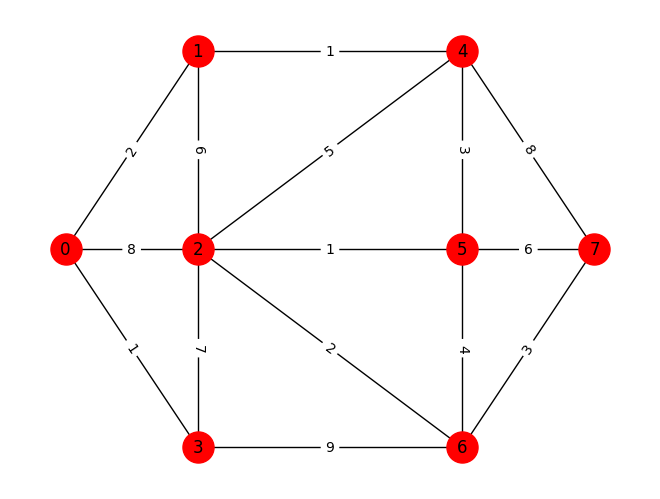

In [90]:
#23课：网络可视化（进阶）
import networkx as nx
# 无向加权图：自定义节点坐标（布局），适用于绘制小规模网络
# 创建一个无向加权图
G = nx.Graph()
nodes = [0,1,2,3,4,5,6,7]
edge_list = [(0,1,2),(0,2,8),(0,3,1),(1,2,6),
                (1, 4, 1), (2, 3, 7), (2, 4, 5), (2, 5, 1),
                (2,6,2),(3,6,9),(4,5,3),(4,7,8),
                (5,6,4),(5,7,6),(6,7,3)]
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edge_list)
# 自定义各个节点的坐标
pos = {0: (-2,0), 1:(-1,1), 2:(-1,0), 3:(-1,-1),
        4: (1,1), 5:(1,0), 6:(1,-1), 7:(2,0)}
nx.draw(G, pos, node_size=500, node_color="red", with_labels=True)

# 将连边标签设定为其权重值
e_labels = {(0, 1):"2",(0, 2):"8",(0, 3):"1",(1, 2):"6",
            (1, 4): "1", (2, 3): "7", (2, 4): "5", (2, 5): "1",
            (2, 6):"2",(3,6):"9",(4, 5):"3",(4,7):"8",
            (5, 6):"4",(5,7):"6",(6, 7):"3"}
nx.draw_networkx_edge_labels(G, pos, edge_labels=e_labels)

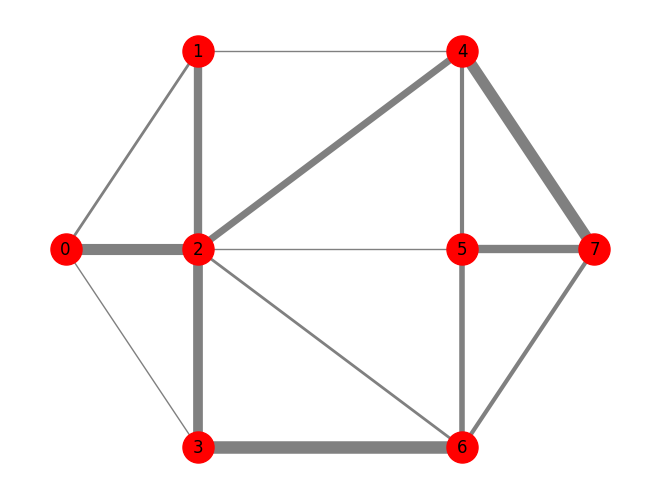

In [91]:
# 设置连边粗细与权重成正比
edgewidth = [G.get_edge_data(*e)['weight'] for e in G.edges()]
options = {
    'pos': pos,
    'node_size': 500,
    'node_color': "red",
    'edge_color': "gray",
    'width': edgewidth,
    'with_labels': True,
}
nx.draw(G, **options) 

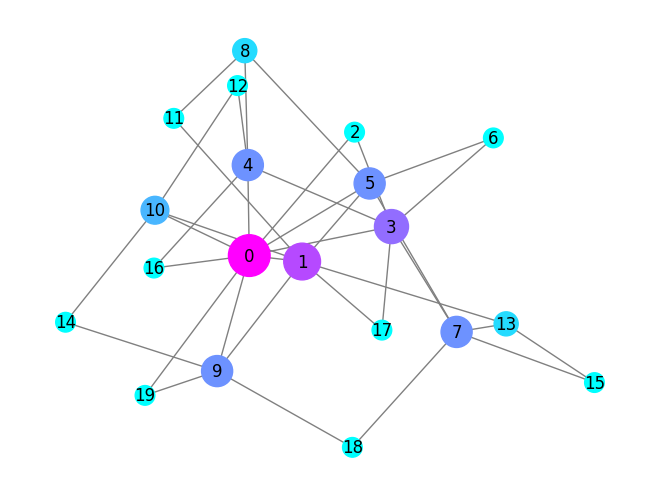

In [96]:
# 24课：网络可视化（高阶）
import matplotlib.pyplot as plt
import networkx as nx
G = nx.barabasi_albert_graph(20,2)
# 绘制网络图，按度值大小设定节点大小和颜色
# 设置节点大小与度成正比
nodesize = [G.degree(i)*100 for i in G.nodes()]
node_colors = [G.degree(i) for i in G.nodes()]
options = {
    'pos': nx.spring_layout(G),
    'node_size': nodesize,
    'node_color': node_colors,
    'cmap': plt.cm.cool, # 设置节点colormap
    'edge_color': "gray",
    'with_labels': True,
}
nx.draw(G, **options)
plt.show()